# Práctica 2: Limpieza y análisis de datos
## Autores
Hemos realizado esta práctica:
* Ignacio Such Ballester
* Andrés Isidro Fonts Santana

## 1. Descripción del _dataset_
### 1.1 Contexto
Se pretende sacar al mercado un nuevo juego de mesa lo más existoso posible y convertirlo en un bestseller.

Para ello, hemos escogido el _dataset_ [Board Game Data](https://www.kaggle.com/datasets/mrpantherson/board-game-data?select=bgg_db_2018_01.csv), disponible en la plataforma Kaggle.

Este conjunto de datos se ha extraído mediante la API del portal [Board Games Geek](https://boardgamegeek.com/). El _dataset_ se generó en enero de 2018 y contiene datos sobre los primeros 5000 juegos de mesa del _ranking_ de Board Games Geek. 

A través de este set de datos, podemos realizar un análisis profundo del mismo, obteniendo correlaciones, clasificaciones en incluso predicciones para averigurar cómo diseñar nuestro juego de mesa.

Además, se podrá proceder a crear modelos de regresión que permitan predecir si un juego será un bestseller o no en función de sus características y contrastes de hipótesis que ayuden a identificar propiedades interesantes en las muestras.

### 1.2 Descripción de los atributos 
Cada uno de los 5000 registros con que cuenta al _dataset_ viene determinado por 20 attributos:

| Nombre      | Tipo    | Descripción                         | Ejemplo
|:------------|:--------|:------------------------------------|:-------------------------------------------------------------
| rank        | int     | Posición en el _ranking_ de BGG     | 21
| bgg_url     | string  | Link a url de la reseña en BGG      | https://boardgamegeek.com/boardgame/167791/terraforming-mars
| game_id     | string  | Identificador del juego en BGG      | 25613
| names       | string  | Nombre del juego                    | Terraforming Mars
| min_players | int     | Número mínimo de jugadores          | 2
| max_players | int     | Número máximo de jugadores          | 4
| avg_time    | int     | Tiempo medio de partida (minutos)   | 60
| min_time    | int     | Tiempo mínimo de partida (minutos)  | 30
| max_time    | int     | Tiempo máx de partida (minutos)     | 120
| year        | int     | Año de publicación                  | 2014
| avg_rating  | float   | Puntuación media del juego según usuarios de BGG (sobre 10)| 8.0096
| geek_rating | float   | Puntuació de BGG, obtenida a través de un algoritmo de ponderación bayesiana (algoritmo no público) |8.49837
| num_votes   | int     | Número de usuarios que han dado puntuación al juego | 1779
| image_url   | string  | Enlace a la imagen del juego  | https://cf.geekdo-images.com/images/pic361592.jpg
| age         | int     | Edad mínimia recomendada | 12
| mechanic    | string  | Tipo de Mecánicas del juego, separadas por comas | Area Enclosure, Card Drafting, Hand Management, Variable Player Powers, Worker Placement
| owned       | int     | Número de usuarios de BGG que han notificado que poseen el juego | 18217
| category    | string  | Categorías a las que pertenece el juego, separadas por comas | Ancient, Card Game, City Building, Civilization
| designer    | string  | Diseñador/a del juego. Si más de uno, separados por comas | Jamey Stegmaier
| weight      | float   | Grado de complejidad del juego (sobre 5) | 2.394


## 2. Carga de datos y selección
Utilizaremos la librería `pandas` para trabajar con los datos.

In [287]:
import pandas as pd
from IPython.display import display, HTML
#import matplotlib

# Llamamos "bgg" al dataframe creado a partir del dataset
bgg = pd.read_csv('../csv/bgg_db_2018_01.csv',sep=',',encoding='latin-1')

Constatamos que los atributos `bgg_url` y `image_url` no nos van a aportar ningún matiz ni información relevante al estudio que queremos realizar sobre los datos. 

Eliminamos estos datos usando el método `.drop()`. 

In [288]:
# Eliminamos las columnas que no utilizaremos para el análisis
bgg.drop('bgg_url'  , inplace=True, axis=1)
bgg.drop('image_url', inplace=True, axis=1)

Por otro lado, según la documentación de BoardGameGeek, para evaluar el _ranking_ global del juego se utiliza el atributo `geek_rating`. Este atributo realiza una ponderación Bayesiana utilizando un algoritmo que BGG no publica.

Sí sabemos que en este algoritmo se compensan aquellos juegos con pocas valoraciones, pudiendo añadir hasta 100 votos _virtuales_ (ver [este enlace](https://boardgamegeek.com/wiki/page/BoardGameGeek_FAQ#toc13)).

Para nuestro estudio, partiremos de aquellos datos que tengan como mínimo 500 valoracion de usuarios.

In [289]:
# Filtrar por mínimo de votos
bgg = bgg[bgg.num_votes > 500]

## 3. Limpieza de los datos
**Esta parte inicial falta completar**

**NOTAS**

Ojo, he visto que avg_time es equivalente a max_time, por lo que habría que recalcular este parámetro como (max-min)/2

Por otro lado, en el dataset no hay valores "NA", pero no quiere decir que no haya valores nulos. Mirando los datos el valor '0' parece indicar el valor nulo o vacío. Hay que tratar esos casos y en vez de poner '0' que ponga 'null' o similar.

También hay al menos 2 entradas que no tienen sentido, como son "Unpublished Prototype" y "Out of the scope of BGG". Fíjate que cuando buscas qué registros tienen valores vacíos te aparecen. Habría que retirarlos del dataset.

Finalmente, sí podemos tener juegos con duración muy extendida, en caso de ser un "Legacy", en que el juego se va desarrollando en modo campaña y se tardan decenas de partidas en acabar el juego. Este tipo de juegos típicamente no tiene rejugabilidad.


In [290]:
# Show 5 rows of the dataframe
bgg.head()

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight
0,1,174430,Gloomhaven,1,4,150,90,150,2017,9.01310,8.52234,9841,12,"Action / Movement Programming, Co-operative Pl...",18217,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7720
1,2,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66575,8.49837,23489,13,"Action Point Allowance System, Co-operative Pl...",38105,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8056
2,3,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.65702,8.32401,10679,14,"Action Point Allowance System, Auction/Bidding...",14147,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3538
3,4,12333,Twilight Struggle,2,2,180,120,180,2005,8.35188,8.21012,29923,13,"Area Control / Area Influence, Campaign / Batt...",41094,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5446
4,5,167791,Terraforming Mars,1,5,120,120,120,2016,8.38331,8.17328,20468,12,"Card Drafting, Hand Management, Tile Placement...",26145,"Economic, Environmental, Industry / Manufactur...",Jacob Fryxelius,3.2465


In [291]:
# Show number of rows in the dataframe
bgg.shape

(2721, 18)

### 3.1 Valores nulos, ceros y elementos vacíos
En primer lugar, revisamos si existens valores nulos o elementos vacíos. Utilizaremos el método `isnull()` para determinar si un dato es nulo, y posteriormente `.sum()` para contar cuantos elementos nulos entontramos en cada atributo.

In [292]:
# Muestra elementos "null" de nuestro conjunto de datos bgg
bgg.isnull().sum()

rank           0
game_id        0
names          0
min_players    0
max_players    0
avg_time       0
min_time       0
max_time       0
year           0
avg_rating     0
geek_rating    0
num_votes      0
age            0
mechanic       0
owned          0
category       0
designer       0
weight         0
dtype: int64

En el conjunto de datos `bgg` no observamos valores nulos.

Los valores nulos podrían estar representados también como valores "cero". Con `.describe()` obtendremos un resumen de nuestro _dataset_ y podremos identificar artributos con valores "cero".

In [293]:
# Muestra valores con .describe(), redondeando a dos decimales
bgg.describe().round(2)

,rank,game_id,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
count,2721.00,2721.00,2721.00,2721.00,2721.00,2721.00,2721.00,2721.00,2721.00,2721.00,2721.00,2721.00,2721.00,2721.00
mean,1541.47,76880.33,2.07,5.21,86.48,67.53,86.33,1996.08,6.92,6.35,3267.92,10.51,4794.14,2.29
std,1078.85,71001.19,0.69,6.16,294.46,142.69,294.49,161.60,0.55,0.50,5775.83,2.73,7811.86,0.77
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-3000.00,5.77,5.64,501.00,0.00,458.00,0.00
25%,681.00,8668.00,2.00,4.00,30.00,30.00,30.00,2003.00,6.50,5.96,798.00,8.00,1444.00,1.71
50%,1366.00,45986.00,2.00,4.00,60.00,45.00,60.00,2009.00,6.88,6.24,1394.00,10.00,2365.00,2.23
75%,2205.00,144270.00,2.00,6.00,90.00,75.00,90.00,2014.00,7.31,6.65,3075.00,12.00,4695.00,2.81
max,4987.00,236191.00,8.00,99.00,12000.00,6000.00,12000.00,2017.00,9.07,8.52,74261.00,18.00,106608.00,4.70


Aquí se puede ver que para algunas observaciones encontramos juegos que tienen valores "cero", como son en las variables `min_players`, `max_players`, `avg_time`, `min_time`, `max_time`, `age` y `weight`.

#### 3.1.1 Variable `min_players`
Empezemos analizando qué datos corresponden a `min_players = 0`.

In [294]:
# Mostramos aquellos registros en que la variable min_players = 0
bgg[bgg['min_players']==0]

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight
2164,2165,18291,Unpublished Prototype,0,0,0,0,0,0,6.97370,5.96984,577,0,none,881,none,(Uncredited),2.4000
2475,2476,23953,Outside the Scope of BGG,0,0,0,0,0,0,6.73655,5.90572,516,0,none,2190,none,(Uncredited),1.6582
2523,2524,21804,Traditional Card Games,0,0,0,0,0,0,6.52588,5.89507,689,0,none,1203,"Card Game, Game System",(Uncredited),2.0169


Por el nombre del juego entendemos que estos registros corresponden a reseñas "genéricas" publicadas en el portal Board Game Geek, no se trata de juegos de mesa reales. De hecho los registros `min_players`, `max_players`, `avg_time`, `min_time`, `max_time`, `year` y `age` son todos `0`.

Decidimos retirar estos registros de nuestro conjunto de datos.

In [295]:
# Eliminamos los registros que corresponden a min_players = 0
bgg = bgg[bgg['min_players']!=0]

Volvamos a comprobar nuestros datos:

In [296]:
# Muestra valores con .describe(), redondeando a dos decimales
bgg.describe().round(2)

,rank,game_id,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
count,2718.00,2718.00,2718.00,2718.00,2718.00,2718.00,2718.00,2718.00,2718.00,2718.00,2718.00,2718.00,2718.00,2718.00
mean,1540.53,76941.62,2.07,5.21,86.58,67.60,86.42,1998.29,6.92,6.35,3270.87,10.53,4797.86,2.29
std,1079.07,71016.34,0.69,6.16,294.61,142.75,294.64,147.44,0.55,0.50,5778.33,2.70,7815.35,0.77
min,1.00,1.00,1.00,1.00,1.00,0.00,0.00,-3000.00,5.77,5.64,501.00,0.00,458.00,0.00
25%,680.25,8581.00,2.00,4.00,30.00,30.00,30.00,2003.00,6.50,5.96,799.50,8.00,1444.50,1.71
50%,1364.50,46110.00,2.00,4.00,60.00,45.00,60.00,2009.00,6.88,6.24,1395.50,10.00,2370.00,2.23
75%,2203.75,144311.25,2.00,6.00,90.00,75.00,90.00,2014.00,7.31,6.65,3076.50,12.00,4704.00,2.81
max,4987.00,236191.00,8.00,99.00,12000.00,6000.00,12000.00,2017.00,9.07,8.52,74261.00,18.00,106608.00,4.70


Quedan por analizar los valores cero de los atributos `min_time`, `max_time`, `age` y `weight`.

#### 3.1.2 Variable `min_time`
Veamos qué registros presentan `min_time = 0`.

In [297]:
# Mostramos aquellos registros en que la variable min_time = 0
bgg[bgg['min_time']==0]

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight
567,568,153016,Telestrations: 12 Player Party Pack,4,12,30,0,30,2011,7.81886,6.76384,1289,12,"Line Drawing, Paper-and-Pencil",2653,Party Game,(Uncredited),1.0968
893,894,181810,Kodama: The Tree Spirits,2,5,40,0,40,2016,6.93798,6.48469,2575,14,"Set Collection, Tile Placement",5578,"Abstract Strategy, Card Game",Daniel Solis,1.6290
1056,1056,175307,Adventure Time Love Letter,2,4,20,0,20,2015,7.29491,6.38417,1164,10,"Hand Management, Player Elimination",2636,"Card Game, Deduction",Seiji Kanai,1.0286
1252,1252,198487,Smash Up: Cease and Desist,2,2,45,0,45,2016,7.62728,6.28925,669,0,"Area Control / Area Influence, Hand Management...",2954,"Card Game, Fantasy",Paul Peterson,0.0000
3092,3093,2375,Sequence,2,12,30,0,30,1982,5.93718,5.79978,5010,7,"Hand Management, Partnerships, Pattern Building",9233,"Abstract Strategy, Card Game",Doug Reuter,1.3529


En estos registros no consta el valor `min_time`. En este caso asumiremos que `min_time = max_time`. Corregimos estos registros.

In [298]:
# Sustituimos los valores '0' por el valor max_time
bgg['min_time'].where(bgg['min_time']!=0, bgg['max_time'], inplace=True)

#### 3.1.3 Variable `max_time`
Comprobemos los registros `max_time = 0`.

In [299]:
# Mostramos aquellos registros en que la variable max_time = 0
bgg[bgg['max_time']==0]

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight
790,791,177524,Ice Cool,2,4,20,20,0,2016,6.93164,6.55288,3301,6,"Area Movement, Take That",5181,"Action / Dexterity, Animals, Children's Game",Brian Gomez,1.0000
799,800,160902,Dungeons & Dragons Dice Masters: Battle for Fa...,2,2,60,60,0,2015,7.42356,6.54724,1265,14,"Deck / Pool Building, Dice Rolling, Variable P...",3295,"Collectible Components, Dice, Fantasy, Fighting","Mike Elliott, Eric M. Lang",2.1636
1359,1359,205046,Capital Lux,2,4,30,30,0,2016,7.12118,6.24605,900,10,"Area Control / Area Influence, Card Drafting, ...",1547,"Bluffing, Card Game, Science Fiction","Eilif Svensson, Kristian Amundsen Østby",2.0000
1478,1478,193308,Spyfall 2,3,12,10,10,0,2017,7.27587,6.19437,712,13,"Acting, Memory, Role Playing, Voting",2065,"Bluffing, Deduction, Party Game, Spies/Secret ...",Alexandr Ushan,1.1667
1802,1802,162559,Smash Up: Munchkin,2,4,45,45,0,2015,6.81948,6.07449,884,12,"Area Control / Area Influence, Hand Management...",3566,"Card Game, Fantasy, Humor",none,2.0952
1834,1834,206931,Noch mal!,1,6,20,20,0,2016,6.97665,6.06526,659,8,Dice Rolling,1123,Dice,"Inka Brand, Markus Brand",1.2143
1959,1959,174614,Apotheca,1,4,30,30,0,2016,6.93168,6.02512,733,13,"Action Point Allowance System, Grid Movement, ...",1583,"Abstract Strategy, Bluffing, Deduction, Puzzle",Andrew Federspiel,1.9524
2457,2458,180602,Game of Trains,2,4,30,30,0,2015,6.39184,5.90795,988,8,Pattern Building,1607,"Card Game, Puzzle, Trains","Alexey Konnov, Alexey Paltsev, Anatoliy Shklyarov",1.2273
2520,2521,172971,Crossing,3,6,15,15,0,2013,6.63155,5.89539,609,6,"Set Collection, Simultaneous Action Selection",925,"Bluffing, Party Game",Yoshiteru Shinohara,1.0909
3127,3128,191982,Knit Wit,2,8,15,15,0,2016,6.28238,5.79471,660,8,"Area Enclosure, Paper-and-Pencil",1240,Word Game,Matt Leacock,1.7692


Como hemos realizado con `min_time`, asumiremos que `max_time = min_time` para todo `max_time = 0`.   

In [300]:
# Sustituimos los valores '0' por el valor min_time
bgg['max_time'].where(bgg['max_time']!=0, bgg['min_time'], inplace=True)

#### 3.1.4 Variable `age`
Revisemos ahora la variable `age` en el caso `age = 0`.

In [301]:
# Mostramos aquellos registros en que la variable age = 0
bgg[bgg['age']==0]

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight
388,389,144189,Fire in the Lake,1,4,180,180,180,2014,8.05631,6.94499,1463,0,"Area Control / Area Influence, Variable Phase ...",3358,"Modern Warfare, Political, Vietnam War, Wargame","Mark Herman, Volko Ruhnke",3.9897
414,415,38996,Washington's War,2,2,90,90,90,2010,7.66716,6.92226,2024,0,"Area Control / Area Influence, Campaign / Batt...",3844,"Age of Reason, American Revolutionary War, War...",Mark Herman,2.8348
477,478,111799,Cuba Libre,1,4,180,180,180,2013,7.77699,6.85330,1567,0,"Area Control / Area Influence, Area Movement, ...",3354,"Economic, Modern Warfare, Political, Wargame","Jeff Grossman, Volko Ruhnke",3.4667
499,500,132018,Churchill,1,3,300,60,300,2015,7.75969,6.82573,1550,0,"Auction/Bidding, Campaign / Battle Card Driven...",2858,"Political, Wargame, World War II",Mark Herman,3.2436
527,528,165722,KLASK,2,2,10,10,10,2014,7.67097,6.80018,1664,0,none,2295,Action / Dexterity,Mikkel Bertelsen,1.0500
571,572,26990,Container,3,5,90,90,90,2007,7.12172,6.76107,3689,0,"Auction/Bidding, Commodity Speculation, Pick-u...",2717,"Economic, Industry / Manufacturing, Nautical, ...","Franz-Benno Delonge, Thomas Ewert",3.2493
622,623,173064,Leaving Earth,1,5,180,60,180,2015,7.90326,6.69773,1118,0,"Pick-up and Deliver, Point to Point Movement, ...",2461,"Science Fiction, Space Exploration",Joseph Fatula,3.5000
665,666,30618,Eat Poop You Cat,3,99,20,20,20,1984,7.49211,6.65923,1425,0,"Line Drawing, Paper-and-Pencil",737,"Humor, Party Game",(Uncredited),1.1215
763,764,163154,Falling Sky: The Gallic Revolt Against Caesar,1,4,360,180,360,2016,8.07103,6.57520,788,0,"Area Control / Area Influence, Area Movement, ...",2225,"Ancient, Wargame","Volko Ruhnke, Andrew Ruhnke",3.9500
885,886,146221,Forge War,1,4,180,60,180,2015,7.40848,6.49184,1225,0,"Grid Movement, Role Playing, Variable Phase Or...",2434,"Adventure, Economic, Fantasy, Industry / Manuf...",Isaac Childres,3.7400


Un total de 54 registros presentan `age = 0`. En este caso consideramos que el valor se desconoce, así que le asignaremos el valor vacío , reemplazando el valor `0`.

In [302]:
# Escribimos el valor None para los valores desconocidos del atributo age
bgg['age'].where(bgg['age']!=0, None, inplace=True)

#### 3.1.5 Variable `weight`
Finalmente revisemos `weight = 0`.

In [303]:
bgg[bgg['weight']==0]

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight
1252,1252,198487,Smash Up: Cease and Desist,2,2,45,45,45,2016,7.62728,6.28925,669,NaN,"Area Control / Area Influence, Hand Management...",2954,"Card Game, Fantasy",Paul Peterson,0.0


Asumiremos pues que el valor de weight se desconoce. Por tanto retiraremos este registro del _dataset_. Consideramos que el grado de complejidad es una variable a tener en cuenta en nuestro estudio. No disponer de este dato impide realizar el estudio completo.

In [304]:
# Eliminamos los registros que corresponden a weight = 0
bgg = bgg[bgg['weight']!=0]

### 3.2 Análisis de valores extremos

In [305]:
# Show row where is max value of avg_time
bgg[bgg['avg_time']==bgg['avg_time'].max()]

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight
930,930,254,Empires in Arms,2,7,12000,6000,12000,1983,7.53768,6.46514,1099,14.0,"Area Movement, Dice Rolling, Secret Unit Deplo...",1851,"Economic, Napoleonic, Negotiation, Political, ...","Greg Pinder, Harry Rowland",4.4316


In [306]:
# Show value table of max_players
bgg.max_players.value_counts()

4     957
5     583
6     467
2     367
8     126
7      57
10     46
3      26
12     22
1      18
99      9
16      8
18      8
9       6
20      5
15      3
30      2
24      2
13      1
11      1
75      1
68      1
21      1
Name: max_players, dtype: int64

In [307]:
# Show rows where min_players equals 0
bgg[bgg['min_players']==0]

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight


In [308]:
# Show value table of min_players
bgg.min_players.value_counts()

2    1860
3     397
1     385
4      58
5       9
8       4
6       4
Name: min_players, dtype: int64

Vemos que en diferentes variables tenemos valores extremos y valores que no concuerdan con el dataset, como por ejemplo que el tiempo medio de una partida sean 27000 minutos.
A continuación, modificamos los valores extremos y los sustituimos por los valores medios de la misma variable.

**NOTA**

Sí podemos tener juegos con duración muy extendida, en caso de ser un "Legacy", en que el juego se va desarrollando en modo campaña y se tardan decenas de partidas en acabar el juego. Este tipo de juegos típicamente no tiene rejugabilidad.

Por otro lado, la columna avg_time es igual a max_time, por lo que la retiraría del data set

In [329]:
# MIN_PLAYERS
# Substitute 0 with min_players mean in min_players column
bgg.min_players.replace(0,1,inplace=True)

#MAX_PLAYERS
# Se sustituyen los valores mayores que 10 por 10 para la variable max_players
bgg['max_players'].where(bgg['max_players'] < 10, 10, inplace=True)
# Para los valores que son 0, se sustituyen por 1.
bgg.max_players.replace(0,1,inplace=True)


#MIN_TIME
# Sustitución de valores superiores a 90 e inferiores a 15
bgg['min_time'].where(bgg['min_time'] < 91, 90, inplace=True)
bgg['min_time'].where(bgg['min_time'] > 16, 15, inplace=True)
# Sustitución de valores específicos de min_time:
bgg.min_time.replace(16,15,inplace=True)
bgg.min_time.replace(42,40,inplace=True)


#AVG_TIME
# Sustituimos todos aquellos valores únicos cuya suma sea inferior a 5, por la media de la variable.
mask = bgg.avg_time.map(bgg.avg_time.value_counts()) < 5
bgg.avg_time =  bgg.avg_time.mask(mask, bgg.avg_time.mean())
# Sustituimos aquellos valores cuyo tiempo medio sea 0 por 15 min.
bgg.avg_time.replace(0,15,inplace=True)

#MAX_TIME
# Sustitución de valores superiores a 300 e inferiores a 10, por los valores 90 y 10 respectivamente.
bgg['max_time'].where(bgg['max_time'] < 300, 90, inplace=True)
bgg['max_time'].where(bgg['max_time'] > 10, 10, inplace=True)
# Sustitución de suma de valores inferior a 5 por la media de la variable.
mask = bgg.max_time.map(bgg.max_time.value_counts()) < 5
bgg.max_time =  bgg.max_time.mask(mask, bgg.max_time.mean())
# Sustituimos aquellos valores cuyo tiempo máximo sea 0 por 15 min.
bgg.max_time.replace(0,15,inplace=True)


#YEAR
# Aquellos años inferiores a 1950, son sustituidos por el mismo.
bgg['year'].where(bgg['year'] > 1950, 1950, inplace=True)


2015    207
2014    195
2013    180
2012    178
2016    175
2011    157
2010    137
2009    134
2008    133
2007    109
2017    105
2004    103
2005    100
2006     94
2003     80
2002     71
1999     52
2001     48
2000     44
1950     34
1998     29
1997     27
1996     25
1995     25
1994     19
1992     19
1986     17
1993     17
1991     15
1985     15
1990     14
1988     13
1983     13
1989     13
1979     12
1977     12
1981     10
1987     10
1982     10
1974      8
1980      8
1984      7
1976      6
1973      5
1975      4
1964      4
1978      4
1962      3
1972      3
1971      2
1967      2
1963      2
1969      2
1960      1
1970      1
1966      1
1965      1
1959      1
1955      1
Name: year, dtype: int64

<AxesSubplot:>

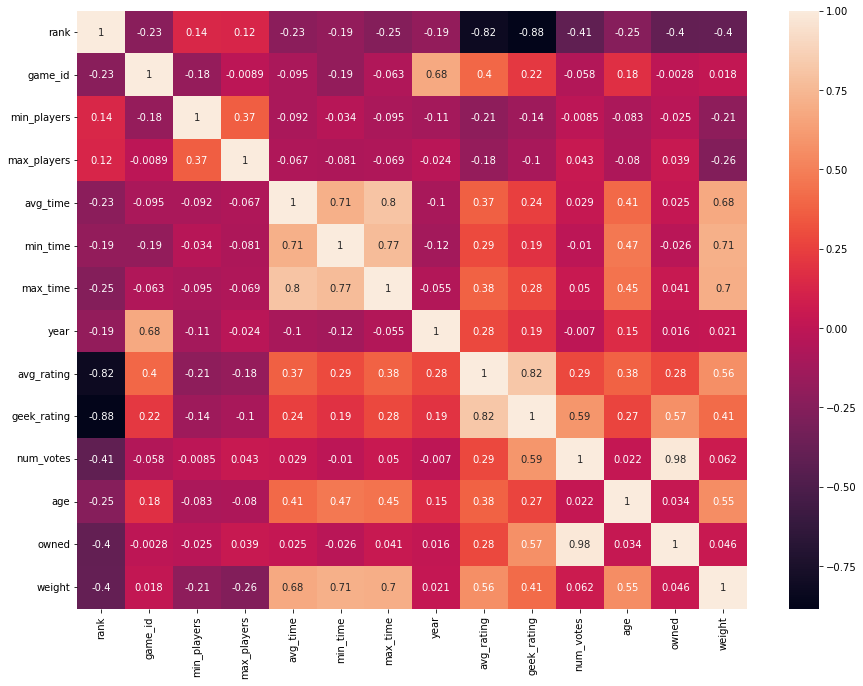

In [310]:
#import pandas.rpy.common as com
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,11)) 

# Calculamos la matriz de correlación
corr = bgg.corr()

# Representamos la matriz de correlación
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

## 4. Análisis de los datos
### 4.1 Popularidad de un juego
En primer lugar analizamos los datos para comprender qué métrica podemos usar para considerar que un juego es **popular**. Disponemos de la variable `owned`, que indica el número de usuarios que han notificado que poseen el juego.

Por otra parte, es comprensible asumir que los juegos que tengan más votos de los usuarios (`num_votes`) puedan ser también juegos más populares.

Por otro lado, el hecho de que un juego tenga un `avg_rating` menor o mayor no necesariamente indica que sea popular. Podemo encontrar juegos de muchísima calidad y con una puntuación elevada, pero que no sea asequible (por precio, complejidad, mecánica, etc) a la mayoría del público.

Veamos la relación entre `owned` y `num_votes`. Importaremos la librería `plotly` para la visualización de los datos.

In [311]:
# Importamos plotly y también lo asignamos como backend de pandas plot.
import plotly.express as px
pd.options.plotting.backend = "plotly"

In [312]:
# Realizo un scatter plot de num_votes vs owned
fig_1 = px.scatter(bgg, x='owned', y='num_votes', 
                 title="Relación entre Número de votos y Usuarios que tienen el juego",
                 labels = {
                     "owned": "Usuarios que tienen el juego (owned)",
                     "num_votes": "Usuarios que han valorado el juego (num_votes)"
                 })
fig_1.show()

Exite pues una relación lineal entre ambas variables `owned` y `num_votes`. Dada la concentración de _data points_ en el extremo inferior izquierdo del gráfico, realizamos un _scatter plot_ con ejes logarítmicos, añadiendo una recta de regresión sobre los datos.

Añadimos también dos aspectos al gráfico. El tamaño indicará el `avg_rating` y el color el `weight` (esto es, la complejidad del juego)

In [313]:
fig_2 = px.scatter(bgg, x='owned', y='num_votes', trendline='ols', log_x=True, log_y=True,
                   color='avg_rating', size="weight", title="Relación entre Número de votos y Usuarios que tienen el juego",
                   labels = {
                     "owned": "Usuarios que tienen el juego (owned)",
                     "num_votes": "Usuarios que han valorado el juego (num_votes)",
                     "weight" : "Nivel complejidad"
                 })
fig_2.show()

# Obtenemos el factor R2 que indica la bondad de la regresión:
r_squared = px.get_trendline_results(fig_2).px_fit_results.iloc[0].rsquared
print("El valor R squared es: ", r_squared)

El valor R squared es:  0.9666974602214029


La bondad del ajuste según el parámetro $R^2$ es $R^2 = 0.967$, luego la recta de regresión se ajusta muy bien a los datos de la curva `num_votes` vs `owned`.

Consideraremos entonces que `num_votes` es un indicador de la **popularidad** que tiene un juego. Podremos también comparar si es necesario con `owned`, pese a que no esperaremos obtener resultados muy diferentes.


### 4.2 Complejidad y Valoración Media
El nivel de complejidad y la valoración media de un juego pueden tener relación con su popularidad. Analizaremos estas variables y su relación con `num_votes` para acotar el espacio de diseño de nuestro juego de mesa.

#### 4.2.1 Nivel de Complejidad - `weight`
Empezaremos representando gráficamente la distribución de la variable `weight` utilizando la función `.histogram` de la librería `pyplot.express`. 

In [314]:
fig_weight = px.histogram(bgg, x="weight", histnorm="probability density", title="Distribución de la variable weight", 
                  labels = {
                      "weight": "Nivel de Complejidad (weight)",
                  })
fig_weight.show()

Comprobemos con el test de _Shapiro-Wilk_ la normalidad de esta distribución. Hemos consultado en la documentación de `plotly` (ver [este enlace](https://plotly.com/python/v3/normality-test/)) cómo utilizar la librería `scipy` para realizar el análisis. 

In [315]:
# Importamos la librería scipy.stats
from scipy.stats import shapiro

# Realizamos el test de shapiro, guardando el resultado en las variables stat y p
stat, p = shapiro(bgg.weight)

# Interpretamos el resultado
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'
    
print("p-value = ", p)
print(msg)

p-value =  3.1157530878689235e-21
Sample does not look Gaussian (reject H0)


Del análisis de normalidad obtenemos que la variable `weight` no sigue una distribución normal.

In [316]:
from scipy.stats import normaltest

stat, p = normaltest(bgg.weight)

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'

result_mat = [
    ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
    [len(bgg.weight), stat, p, msg]
]

print(result_mat)

[['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'], [2717, 107.42422386978228, 4.711141790269297e-24, 'Sample does not look Gaussian (reject H0)']]


#### 4.2.1 Valoración media de los usuarios - `avg_rating`
Evaluemos la distribución de la variable `avg_rating`.

In [317]:
fig_rating = px.histogram(bgg, x="avg_rating", histnorm="probability density", title="Distribución de la variable avg_rating", 
                  labels = {
                      "avg_rating": "Valoración media de los usuarios (avg_rating)",
                  })
fig_rating.show()

In [318]:
from scipy.stats import normaltest

stat, p = normaltest(bgg.avg_rating)

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'

result_mat = [
    ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
    [len(bgg.avg_rating), stat, p, msg]
]

print(result_mat)

[['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'], [2717, 68.24448061932387, 1.5166987307858337e-15, 'Sample does not look Gaussian (reject H0)']]


### 4.3 Relación entre Complejidad y Popularidad
Pensamos que la complejidad del juego puede ser un factor clave en cuanto a la popularidad esperada. Analizaremos a continuación la relación entre complejidad (atributo `weight`) y la popularidad (atributo `owned`, esto es, cuántos usuarios han notificado que poseen el juego).

In [319]:
fig = px.histogram(bgg, x="weight", y="num_votes", marginal="box",
                   hover_data=bgg.columns)
fig.show()

### 4.4 Relación entre Valoración media y Popularidad
FALTA DESCRIPCIÓN

In [320]:
fig = px.histogram(bgg, x="avg_rating", y="num_votes", marginal="box",
                   hover_data=bgg.columns)
fig.show()

### 4.x Relación entre Categorías y Juegos Comprados 
Queremos ver cúales son las temáticas o categorías que mas juegos hay en el mercado, para de este modo saber las tendencias tanto actuales como pasadas.

In [321]:
# Plot top 9 category values count in the dataframe
bgg.category.value_counts().head(9).plot(kind='barh')


Vemos que de los top 9 categorías, 4 son juegos de mesa de guerra. Por otro lado, hay juegos de cartas, dados y estrategia. Ahora, queremos ver si estos juegos han llegado a tener muchas ventas o si son solo ha sido una moda o hay un trend que sean solo juegos de mesa sobre guerras:


In [322]:
# Merge top 9 category column values with owned column values to get the top 9 categories with the most games owned by users in the dataframe and plot it
bgg[['category','owned']].groupby('category').sum().sort_values(by='owned', ascending=False).head(9).plot(kind='barh')


Podemos ver que, por muchos juegos de la categoría 'wargame' existan en el mercado, no indica que sean de los más vendidos a excepción de los juegos de la segunda guerra mundial. No obstante, es la tercera categoría más comprada. Por otro lado, podemos ver que, estas nueve categorías han tenido al menos 100.000 ventas, por lo que puede ser un buen comienzo para saber por qué temática comenzar, llegando a ver que los tipos de cartas han llegado hasta las casi 350 mil copias vendidas. 

### 4.x Relación entre Mecánicas de Juegos y Juegos Comprados 
Queremos ver cúales son las temáticas o categorías que mas juegos hay en el mercado, para de este modo saber las tendencias tanto actuales como pasadas.

In [323]:
# Plot top 9 category values count in the dataframe
bgg.mechanic.value_counts().head(9).plot(kind='barh')

In [324]:
# Merge top 9 category column values with owned column values to get the top 9 categories with the most games owned by users in the dataframe and plot it
bgg[['mechanic','owned']].groupby('mechanic').sum().sort_values(by='owned', ascending=False).head(9).plot(kind='barh')

#fig = px.histogram(df, x="mechanic", y="owned", marginal="box",hover_data=df.columns, nbins=1)
#fig.show()

# Zona de test

In [325]:

plot2 = bgg.head(1000).plot.scatter(x="avg_rating", y="weight")
plot2

In [326]:
plot3 = bgg.head(250).plot.scatter(x="owned", y="geek_rating")
plot3

In [327]:
#min_votes = bgg['num_votes'] > 2000
min_weight = bgg['weight'] > 1.5
min_rating = bgg['avg_rating'] > 6

df = bgg[min_weight & min_rating]
fig = px.scatter(df, x='owned', y='num_votes', trendline='ols', log_x=True, log_y=True, color='avg_rating')
#plot4 = bgg[min_votes].plot.scatter(log_x=True, log_y=True, x="owned", y="num_votes", trendline='ols')
#plot4


In [328]:
import pandas as pd

# Assuming that dataframes df1 and df2 are already defined:

print( "Dataframe 2:")
display(HTML(bgg.head().to_html()))


#bgg=pd.read_csv('../csv/bgg_db_2018_01.csv',sep=',',encoding='latin-1')


Dataframe 2:


,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight
0,1,174430,Gloomhaven,1,4,150.0,90,150.0,2017,9.01310,8.52234,9841,12.0,"Action / Movement Programming, Co-operative Play, Grid Movement, Hand Management, Modular Board, Role Playing, Simultaneous Action Selection, Storytelling, Variable Player Powers",18217,"Adventure, Exploration, Fantasy, Fighting, Miniatures",Isaac Childres,3.7720
1,2,161936,Pandemic Legacy: Season 1,2,4,60.0,60,60.0,2015,8.66575,8.49837,23489,13.0,"Action Point Allowance System, Co-operative Play, Hand Management, Point to Point Movement, Set Collection, Trading, Variable Player Powers",38105,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8056
2,3,182028,Through the Ages: A New Story of Civilization,2,4,240.0,90,240.0,2015,8.65702,8.32401,10679,14.0,"Action Point Allowance System, Auction/Bidding, Card Drafting",14147,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3538
3,4,12333,Twilight Struggle,2,2,180.0,90,180.0,2005,8.35188,8.21012,29923,13.0,"Area Control / Area Influence, Campaign / Battle Card Driven, Dice Rolling, Hand Management, Simultaneous Action Selection",41094,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5446
4,5,167791,Terraforming Mars,1,5,120.0,90,120.0,2016,8.38331,8.17328,20468,12.0,"Card Drafting, Hand Management, Tile Placement, Variable Player Powers",26145,"Economic, Environmental, Industry / Manufacturing, Science Fiction, Territory Building",Jacob Fryxelius,3.2465


## Referencias consultadas


Board Game Rank \[en línea\] \[fecha de consulta: 30 de mayo de 2022\]. Disponible en: https://boardgamegeek.com/browse/boardgame?sort=rank&sortdir=desc

BoardGameGeek FAQ \[en línea\] \[fecha de consulta: 31 de mayo de 2022\]. Disponible en: https://boardgamegeek.com/wiki/page/BoardGameGeek_FAQ#toc13

BoardGameWiki. Weight \[en línea\] \[fecha de consulta: 31 de mayo de 2022\]. Disponible en: https://boardgamegeek.com/wiki/page/Weight

How to delete a column in pandas \[en línea\] \[fecha de consulta: 01 de junio de 2022\]. Disponible en: https://www.educative.io/edpresso/how-to-delete-a-column-in-pandas

Pandas Plotting Backend in Python \[en línea\] \[fecha de consulta: 02 de junio de 2022\]. Disponible en: https://plotly.com/python/pandas-backend/

Working with Markdown tables in GitHub \[en línea\] \[fecha de consulta: 03 de junio de 2022\]. Disponible en: https://www.pluralsight.com/guides/working-tables-github-markdown

Practical Business Python. Overview of Pandas Data Types \[en línea\] \[fecha de consulta: 3 de junio de 2022\]. Disponible en: https://pbpython.com/pandas_dtypes.html

Setting the Font, Title, Legend Entries, and Axis Titles in Python \[en línea\] \[fecha de consulta: 3 de junio de 2022\]. Disponible en: https://plotly.com/python/figure-labels/

Plotly Documentation. plotly.express.histogram \[en línea\] \[fecha de consulta: 3 de junio de 2022\]. Disponible en: https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html

Plotly Documentation. Normality Tests in Python/v3 \[en línea\] \[fecha de consulta: 3 de junio de 2022\]. Disponible en: https://plotly.com/python/v3/normality-test/

Stackoverflow. Correlation heatmap \[en línea\] \[fecha de consulta: 3 de junio de 2022\]. Disponible en: https://stackoverflow.com/questions/39409866/correlation-heatmap

Seaborn Documentation. seaborn.heatmap \[en línea\] \[fecha de consulta: 3 de junio de 2022\]. Disponible en: https://seaborn.pydata.org/generated/seaborn.heatmap.html

